# Proyecto parte III
En esta ocacion crearemos un modelo de aprendizaje que nos permita clasificar si una empresa tiene indices de negocio muy similares a las que cayeron en bancarrota.

In [23]:
import pandas as pd
from sklearn.datasets import make_classification
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix , classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# Datos
CBP = pd.read_csv('https://media.githubusercontent.com/media/Gonzalo-Ariel-Alonso/Proyecto_Data_Science/master/Company%20Bankruptcy%20Prediction.csv')
CBP

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


## Escalado
Colocamos todos los datos en la misma escala para evitar cualquier tipo de sesgo por parte del modelo

In [25]:
from sklearn.preprocessing import MinMaxScaler as MMS

scaler = MMS()

CBP_scaled = scaler.fit_transform(CBP)
CBP_scaled = pd.DataFrame(CBP_scaled, columns = list(CBP.columns))

## Oversampling 
Generamos nuevas muestras para balancear nuestro modelo

In [26]:
x = CBP_scaled.loc[:, CBP.columns != 'Bankrupt?']
y = CBP_scaled['Bankrupt?']

In [27]:
from collections import Counter
from imblearn.over_sampling import SMOTE
count = Counter(y)

os = SMOTE()
x_os , y_os = os.fit_resample(x,y)
count

Counter({0.0: 6599, 1.0: 220})

In [28]:
count = Counter(y_os)
count

Counter({1.0: 6599, 0.0: 6599})

# Featured selection
Como ya hemos mencionado anteriormente, nuestro dataset tiene demasiadas dimenciones para ser analizadas individualmente, en ejericios pasados utilizamos PCA y matriz de correlacion para disminuir la cantidad de variables, en esta ocacion utilizaremos una funcion de sequential feature selector (sfs) con el algoritmo de Logistic Regression, utilizando como guia  la presicion (accuracy).

In [29]:
import sys
import joblib
sys.modules['sklearn.externals.joblib'] = joblib

In [30]:
# Constructor
sfs = SFS(estimator = LogisticRegression(n_jobs = -1), 
          k_features = 12,
          forward = True,
          floating = False,
          verbose = 2,
          scoring = 'accuracy',
          cv = 3)
# fit
sfs.fit(x_os,y_os)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  95 out of  95 | elapsed:    9.0s finished

[2023-05-25 11:46:22] Features: 1/12 -- score: 0.8326271811086542[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  94 out of  94 | elapsed:    3.1s finished

[2023-05-25 11:46:26] Features: 2/12 -- score: 0.8678611874599599[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  93 out of  93 | elapsed:    3.7s finished

[2023-05-25 11:46:29] Features: 3/12 -- score: 0.8722557640510584[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

SequentialFeatureSelector(cv=3, estimator=LogisticRegression(n_jobs=-1),
                          k_features=(12, 12), scoring='accuracy', verbose=2)

Inicialmente le pedimos al algortimo que nos devuelva 12 variables, no obstante podemos observar que a partir de la novena el score deja de tener una variacion significante, asi que podemos quedarnos solo con 9 de las 95 variables.

In [31]:
# Constructor
sfs_2 = SFS(estimator = LogisticRegression(n_jobs = -1), 
          k_features = 9,
          forward = True,
          floating = False,
          scoring = 'accuracy')

# Fit
sfs_2.fit(x_os,y_os)

# Variables resultantes
print('Las 9 variables mas importantes son: ')
print(sfs_2.k_feature_names_)

Las 9 variables mas importantes son: 
(' Persistent EPS in the Last Four Seasons', ' Borrowing dependency', ' Current Liabilities/Equity', ' Current Asset Turnover Rate', ' Equity to Long-term Liability', ' Cash Flow to Liability', ' Liability-Assets Flag', ' Liability to Equity', ' Equity to Liability')


In [11]:
x_os = x_os[[' Continuous interest rate (after tax)',
 ' Cash flow rate',
 ' Persistent EPS in the Last Four Seasons',
 ' Borrowing dependency',
 ' Working Capital/Equity',
 ' Equity to Long-term Liability',
 ' Cash Flow to Liability',
 ' Liability-Assets Flag',
 ' Equity to Liability']]
x_os

,Continuous interest rate (after tax),Cash flow rate,Persistent EPS in the Last Four Seasons,Borrowing dependency,Working Capital/Equity,Equity to Long-term Liability,Cash Flow to Liability,Liability-Assets Flag,Equity to Liability
0,0.780985,0.458143,0.169141,0.390284,0.721275,0.126549,0.458609,0.0,0.016469
1,0.781506,0.461867,0.208944,0.376760,0.731975,0.120916,0.459001,0.0,0.020794
2,0.780284,0.458521,0.180581,0.379093,0.742729,0.117922,0.459254,0.0,0.016474
3,0.781241,0.465705,0.193722,0.379743,0.729825,0.120760,0.448518,0.0,0.023982
4,0.781550,0.462746,0.212537,0.375025,0.732000,0.110933,0.454411,0.0,0.035490
...,...,...,...,...,...,...,...,...,...
13193,0.781406,0.457307,0.188307,0.387895,0.733791,0.121302,0.457876,0.0,0.017466
13194,0.781277,0.460025,0.158717,0.395648,0.734343,0.136705,0.458633,0.0,0.015941
13195,0.781340,0.464637,0.193517,0.377912,0.726439,0.116112,0.458527,0.0,0.021670
13196,0.781465,0.455364,0.196566,0.381365,0.732887,0.112984,0.459125,0.0,0.018615


Ya estamos en condiciones de entrenar un algoritmo de clacificacion.

# Regrecion Logistica
Nuestro dataset nos precenta un problema de clacificaion binaria, asi que para entrenar un modelo de machine learning podemos utilizar el algoritmo de regresion logistica.

In [12]:
# Separacion de datos de prueba y entrenamiento
X_train, X_test , y_train , y_test = train_test_split(x_os , y_os ,test_size = 0.2)

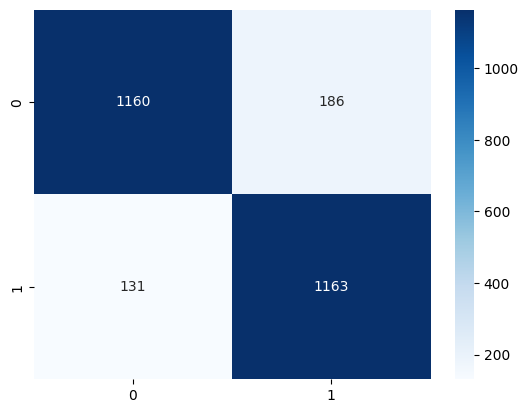

In [32]:
# Entrenamiento
LR = LogisticRegression()
LR.fit(X_train,y_train)

# Prediccion
y_pred = LR.predict(X_test)

# Matriz de confucion
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(data = cm, annot = True,cmap='Blues', fmt='g')
plt.show()

# Metricas de validacion
Nuestro modelo es de clacificacion binaria, es decir, solo tenemos dos posibles resultados: empresa en bancarrota u operativa. No obstante, sabemos que no hay un indice economico exacto que nos diga si una empresa va a quebrar o no, de hecho existen empresas cuyos indices son pesimos y aun siguen operativas, y como contraparte, hay empresas que poseían indices "saludables" y entraron en bancarrota. Esto nos lleva a concluir que el entrenamiento de nuestro algoritmo debe estar enfocado a dar la menor cantidad de falsos negativos, pensemoslo de esta manera, si nuesto algoritmo nos dice que una empresa esta cerca de la bancarrota cuando no lo esta, solo tendiramos que abstenernos de invertir en ella y evitariamos cualquier tipo de perdida, quizas tampoco ganariamos, pero en inversiones lo mas importante es no perder. Ahora demos vuelta el caso, si nuestro algoritmo nos dice que una empresa tiene indices lejanos a la bancarrota, y se decide invertir en la misma, tener una lectura errada en esta instancia probocaria la perdida total del dinero invertido.

Es por esto que debemos minimizar los falsos positivos, y para esto debemos lograr la mejor presicion posible.

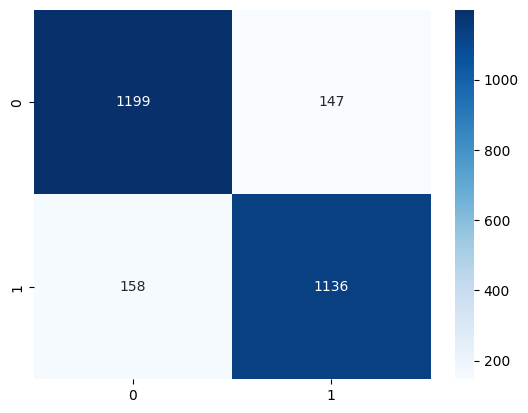

In [20]:
# Entrenamiento refinado
LR_2 = LogisticRegression(penalty = None, max_iter = 1000)
LR_2.fit(X_train,y_train)

# Prediccion 2
y_pred_2 = LR_2.predict(X_test)

# Matriz de confucion
cm_2 = confusion_matrix(y_test, y_pred_2)
sns.heatmap(data = cm_2, annot = True,cmap='Blues', fmt='g')
plt.show()

Modificando algunos parametros del algoritmo logramos disminuir los falsos positivos, que son los mas importantes, a costa de aumentar los falsos negativos, los cuales no son tan relevantes.

In [33]:
print(classification_report(y_test, y_pred_2))

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89      1346
         1.0       0.89      0.88      0.88      1294

    accuracy                           0.88      2640
   macro avg       0.88      0.88      0.88      2640
weighted avg       0.88      0.88      0.88      2640



# Concluciones
 En este proyecto tuvimos que: llevar todos los datos a la misma escala, balancear nuestro dataset para obtener la misma cantidad de muestrar de cada clasificacion, filtar variables utilizando un algortimo de regrecion, dividir los datos en partes de prueba y entrenamiento, y finalmente entrenar un modelo de regrecion logistica, con esto logramos crear un algoritmo que nos permite anticiparonos con casi un 90% de certeza si una empresa caera o esta muy cerca de la bancarrota.